In [855]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [856]:
df = pd.read_csv('train.csv')

# Ask Basic Question

In [857]:
# How big is the dataset?
df.shape

(1460, 81)

In [858]:
# how does the dataset look?
df.head()
#df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [859]:
# what is the data type of each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [860]:
# are there any missing values?
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [861]:
# how does the data look mathematically?
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [862]:
# are there duplicates?
df.duplicated().sum()

np.int64(0)

In [863]:
# how is the correlation between the features?
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Handling Missing Data

In [864]:
# Show percentage of missing values, sorted descending, top 10
df.isnull().mean().sort_values(ascending=False).head(15) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
dtype: float64

In [865]:
df['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [866]:
# So in 1460 there are 1456 rows with 0 PoolArea, so I'm sropping the column,
# because it doesn't add any value to the dataset.
# also, droping PoolQC (pool quality) because it is realted to PoolArea
# and has too many missing values.
df = df.drop(columns=['PoolArea', 'PoolQC'])

In [867]:
df.shape

(1460, 79)

In [868]:
df.isnull().mean().sort_values(ascending=False).head(15) * 100

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [869]:
# MiscFeature: Miscellaneous feature that are not covered in other categories.
# It has too many missing values and the values are not very informative.
# So I'm dropping it.

# Alley: 93% of total house does not have alley access. 
# So I don't think it adds any value to the dataset.

# Fence: 80% of total house does not have fence.
# So I don't think it adds any value to the dataset.

# MasVnrType: 59% of total house does not have masonry veneer.
# So I don't think it adds any value to the dataset.

df = df.drop(columns=['MiscFeature', 'Alley', 'Fence', 'MasVnrType'])

In [870]:
df.shape   

(1460, 75)

# Imputing missing value:

choosing how to do it depends on:
- The percentage of missing data
- The importance of the variable
- Whether it's MCAR (Missing Completely At Random), MAR (Missing At Random), or MNAR (Missing Not At Random)
- The type of variable (categorical/numerical)
- How much information you'd lose

### 1. FireplaceQu

In [871]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
LotConfig        0.000000
LandSlope        0.000000
Street           0.000000
dtype: float64

In [872]:
df['FireplaceQu'].apply(type).value_counts()

FireplaceQu
<class 'str'>      770
<class 'float'>    690
Name: count, dtype: int64

In [873]:
# Imputing missing value. the null values in FireplaceQu are replaced with 'None'.
# This is because the null values indicate that there is no fireplace in the house.

df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [874]:
df['FireplaceQu'].apply(type).value_counts()

FireplaceQu
<class 'str'>    1460
Name: count, dtype: int64

### 2. LotFrontage

In [875]:
# Step 1: What does LotFrontage mean?
# LotFrontage: Linear feet of street connected to property.
# It is the length of the property that is connected to the street.

In [876]:
missing_LotFrontage_type = df[df['LotFrontage'].isnull()]
print(missing_LotFrontage_type['LotFrontage'].value_counts())

Series([], Name: count, dtype: int64)


In [877]:
#  Step 2: Check Missing Pattern — Is It Missing Randomly?
# Count missing values per neighborhood
df[df['LotFrontage'].isnull()]['Neighborhood'].value_counts()
# so missing values are not random, they are concentrated in certain neighborhoods.

Neighborhood
NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Edwards     8
Timber      8
Somerst     8
NoRidge     8
BrkSide     7
StoneBr     5
OldTown     4
Veenker     4
IDOTRR      3
Blmngtn     3
NPkVill     2
MeadowV     2
SWISU       2
NridgHt     1
Name: count, dtype: int64

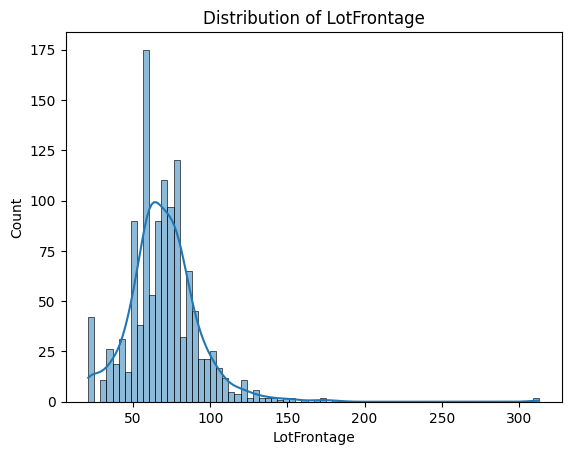

In [878]:
sns.histplot(df['LotFrontage'], kde=True)
plt.title('Distribution of LotFrontage')
plt.show()

# data is not normally distributed, it is skewed to the left.
# so we can use median to fill the missing values.

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

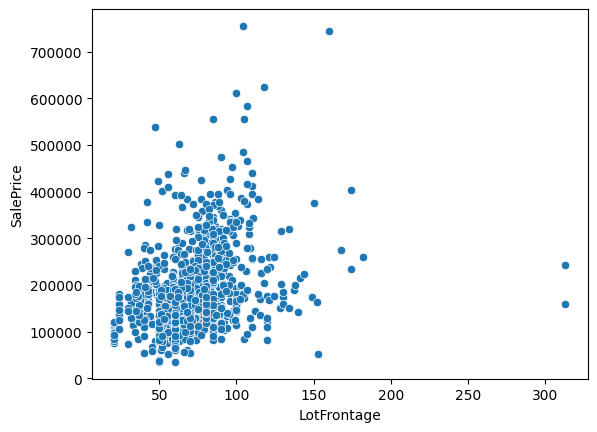

In [879]:
# Step 3: Visualize Relationship with Target Variable
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice')

# so LotFrontage has a limited impact on sale price beyond a certain point

In [880]:
# Step 4: Check Correlation 
correlation = df['LotFrontage'].corr(df['SalePrice'])
print(f"Correlation with SalePrice: {correlation}")

Correlation with SalePrice: 0.351799096570678


In [881]:
df[['LotFrontage', 'LotArea', 'GrLivArea', 'SalePrice']].corr()

,LotFrontage,LotArea,GrLivArea,SalePrice
LotFrontage,1.000000,0.426095,0.402797,0.351799
LotArea,0.426095,1.000000,0.263116,0.263843
GrLivArea,0.402797,0.263116,1.000000,0.708624
SalePrice,0.351799,0.263843,0.708624,1.000000


In [882]:
# Step 5: Compare Feature Importance via Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Simple Imputation for missing LotFrontage (temp)
imputer = SimpleImputer(strategy='median')
df['LotFrontage'] = imputer.fit_transform(df[['LotFrontage']])

features = ['LotFrontage', 'LotArea', 'GrLivArea']
X = df[features]
y = df['SalePrice']

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
for f, imp in zip(features, importances):
    print(f"{f}: {imp:.4f}")


LotFrontage: 0.1514
LotArea: 0.1772
GrLivArea: 0.6714


In [883]:
'''
| Reason                                          | Explanation                                  |
| ----------------------------------------------- | -------------------------------------------- |
| ✅ Feature importance is **decent**              | 15% is not negligible — it’s adding signal   |
| ✅ Helps with property size, street access info  | Which affects price                          |
| ✅ Might interact well with other features       | Especially neighborhood or building type     |
| ❌ Dropping it means **losing predictive power** | Even if you can’t recover all missing values |
'''

'\n| Reason                                          | Explanation                                  |\n| ----------------------------------------------- | -------------------------------------------- |\n| ✅ Feature importance is **decent**              | 15% is not negligible — it’s adding signal   |\n| ✅ Helps with property size, street access info  | Which affects price                          |\n| ✅ Might interact well with other features       | Especially neighborhood or building type     |\n| ❌ Dropping it means **losing predictive power** | Even if you can’t recover all missing values |\n'

### 3. GarageType

In [884]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

GarageType      5.547945
GarageYrBlt     5.547945
GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
LandSlope       0.000000
Utilities       0.000000
LotConfig       0.000000
LotShape        0.000000
Street          0.000000
dtype: float64

In [885]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [886]:
# Check if missing GarageType correlates with GarageArea = 0
missing_garage_type = df[df['GarageType'].isnull()]
print(missing_garage_type['GarageArea'].value_counts())
# If many missing GarageType rows have GarageArea = 0, it suggests MNAR (e.g., no garage).

GarageArea
0    81
Name: count, dtype: int64


In [887]:
# imputing missing GarageType values, with None
df['GarageType_NoNull'] = df['GarageType'].fillna('None')
df['GarageType_NoNull']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType_NoNull, Length: 1460, dtype: object

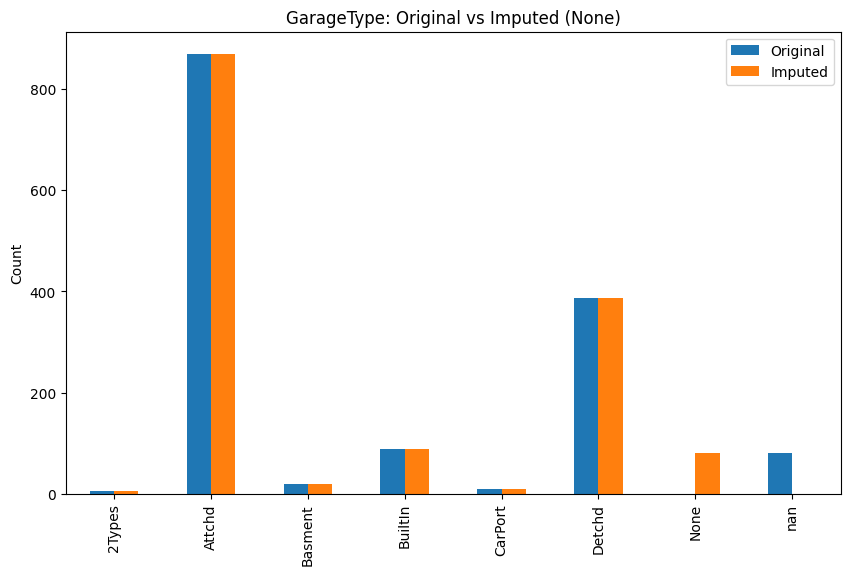

In [888]:
# Compare value counts for original and imputed GarageType
original_counts = df['GarageType'].value_counts(dropna=False)
imputed_counts = df['GarageType_NoNull'].value_counts()

# Combine into a DataFrame for side-by-side comparison
comparison = pd.DataFrame({
    'Original': original_counts,
    'Imputed': imputed_counts
}).fillna(0)

# Plot as bar chart
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('GarageType: Original vs Imputed (None)')
plt.ylabel('Count')
plt.show()

In [889]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [890]:
df = df.drop(columns=['GarageType'])

### 4. GarageYrBlt

In [891]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
Electrical      0.068493
LandSlope       0.000000
LotConfig       0.000000
Utilities       0.000000
LandContour     0.000000
LotShape        0.000000
Street          0.000000
dtype: float64

In [892]:
correlation = df['GarageYrBlt'].corr(df['SalePrice'])
print(f"Correlation with SalePrice: {correlation}")

Correlation with SalePrice: 0.48636167748786086


In [893]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

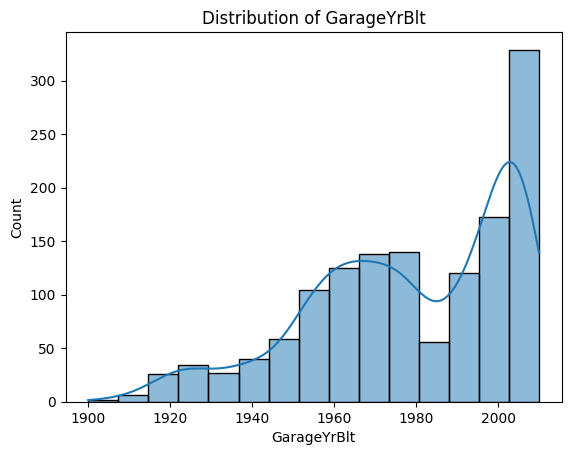

In [894]:
sns.histplot(df['GarageYrBlt'], kde=True)
plt.title('Distribution of GarageYrBlt')
plt.show()

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

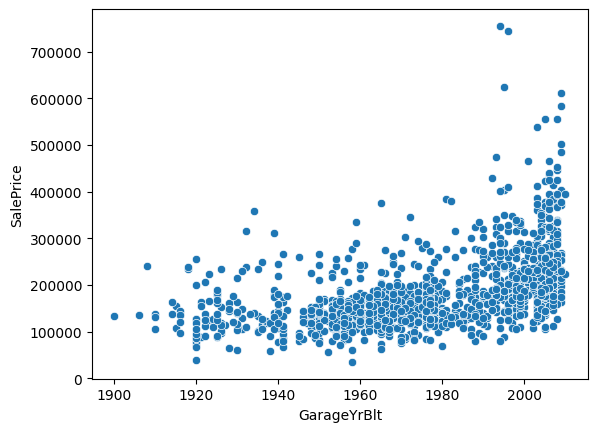

In [895]:
sns.scatterplot(data=df, x='GarageYrBlt', y='SalePrice')

# so here is the thing is, the GarageYrBlt have high impact in saleprice. 

In [896]:
mode_GarageYrBlt = df['GarageYrBlt'].mode()[0] # I have to put 0 here. because mode can return multiple values.
# So I'm using the first value of the mode.
df['GarageYrBlt_NoNull'] = df['GarageYrBlt'].fillna(mode_GarageYrBlt)

In [897]:
mean_GarageYrBlt = df['GarageYrBlt'].mean()
df['GarageYrBlt_NoNull2'] = df['GarageYrBlt'].fillna(mean_GarageYrBlt)

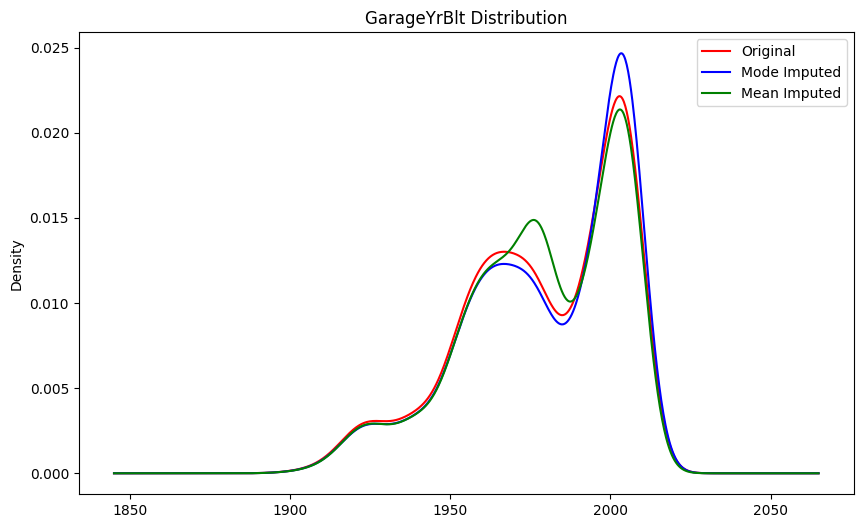

In [898]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
df['GarageYrBlt'].plot(kind = 'kde', ax=ax, label='Original', color = 'red')
df['GarageYrBlt_NoNull'].plot(kind = 'kde', ax=ax, label='Mode Imputed', color = 'blue')
df['GarageYrBlt_NoNull2'].plot(kind = 'kde', ax=ax, label='Mean Imputed', color = 'green')
ax.set_title('GarageYrBlt Distribution')
ax.legend()
plt.show()

In [899]:
# so there the diffrence imputing the missing values with mode is good, but mean is not that good.
# because the mean is affected by outliers, so it is not a good choice for this
df = df.drop(columns=['GarageYrBlt', 'GarageYrBlt_NoNull2'])

### 5. GarageFinish

In [900]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
Id              0.000000
LandSlope       0.000000
LotConfig       0.000000
Utilities       0.000000
LandContour     0.000000
LotShape        0.000000
Street          0.000000
dtype: float64

In [901]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [902]:
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [903]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)